___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [141]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from ipywidgets import interact

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.nunique()

CustomerID        200
Gender              2
Age                51
Annual_Income      64
Spending_Score     84
dtype: int64

In [12]:
df.notnull().sum()

CustomerID        200
Gender            200
Age               200
Annual_Income     200
Spending_Score    200
dtype: int64

In [13]:
# Customer ID is unnecessary here, and we shouldn't keep it.
df.drop(columns= "CustomerID", inplace=True)

In [21]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

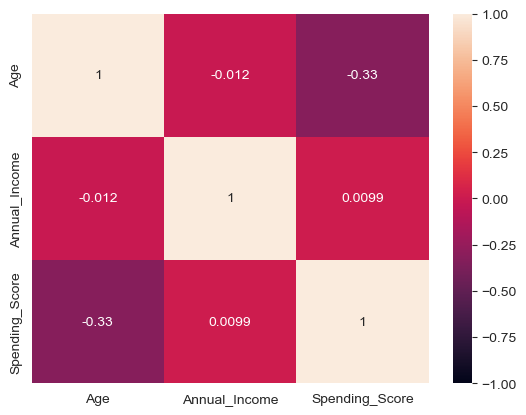

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1);

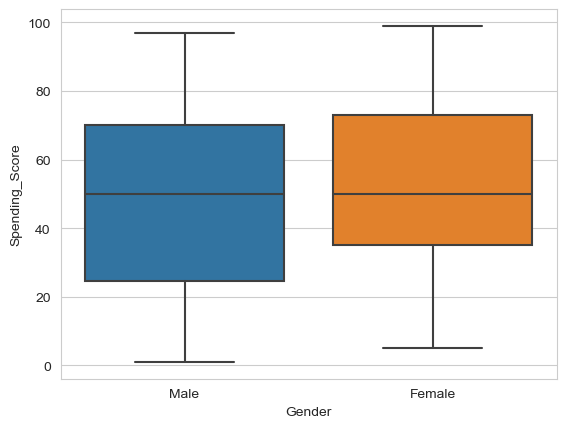

In [70]:
sns.boxplot(x='Gender', y='Spending_Score', data=df);

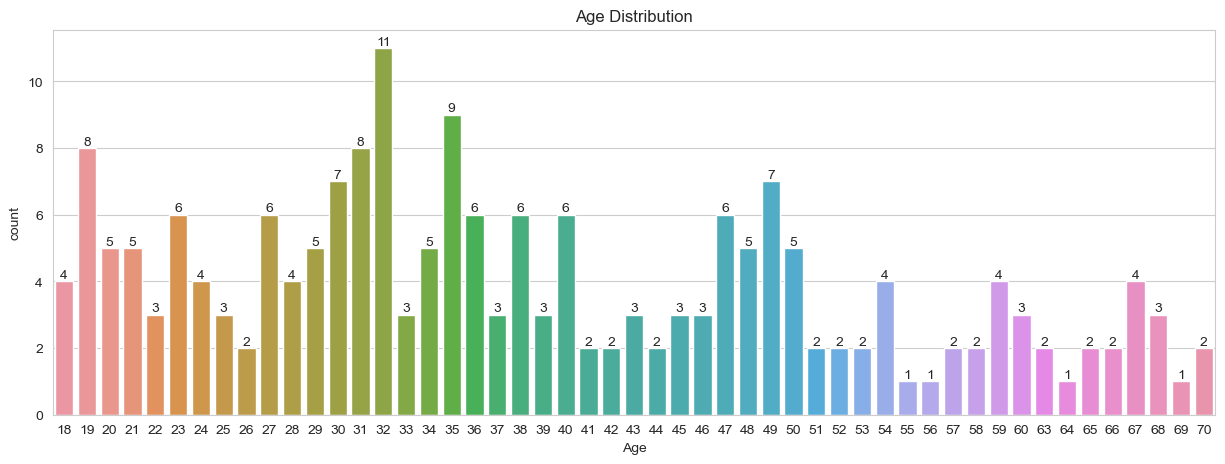

In [61]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

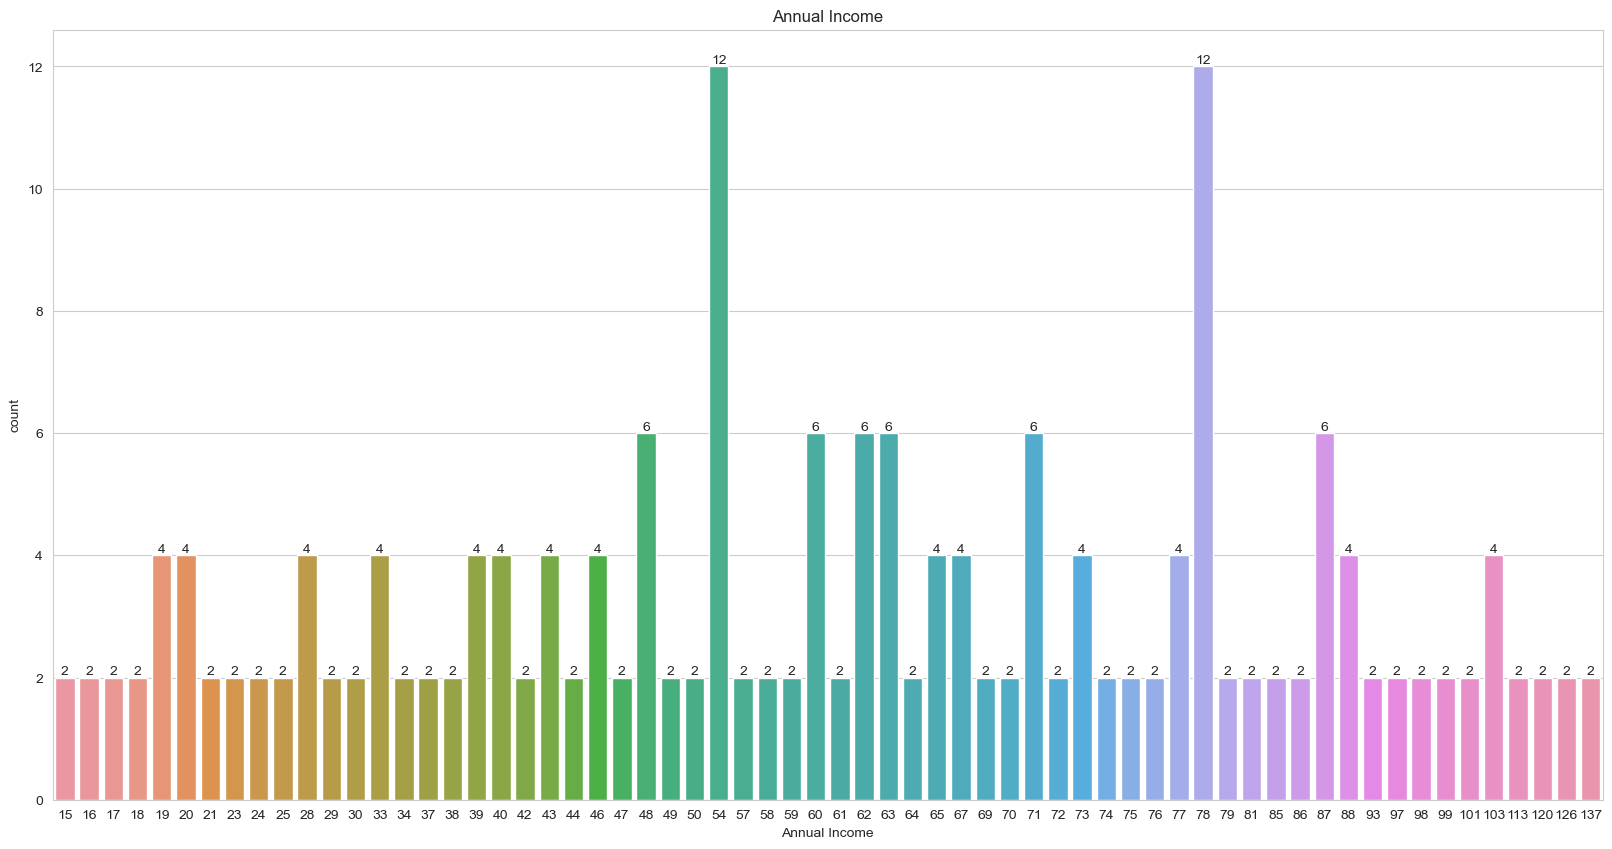

In [62]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual_Income', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income')
ax.bar_label(ax.containers[0]);

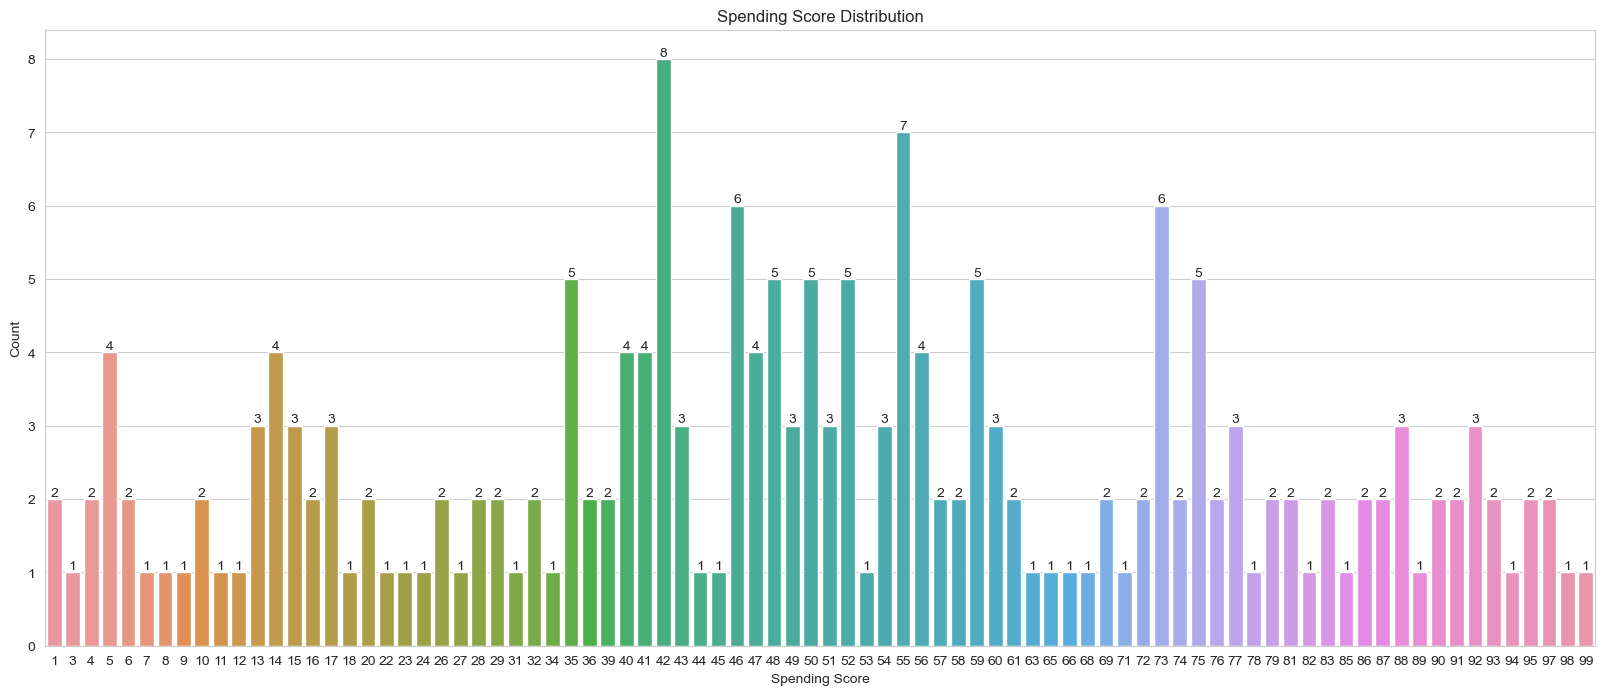

In [73]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

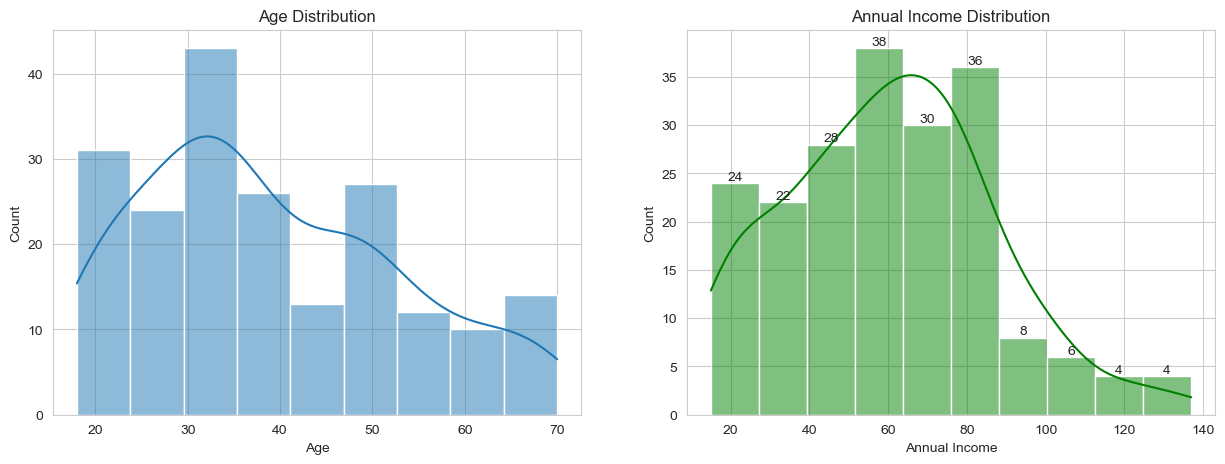

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

plt.subplot(1,2,2)
ax = sns.histplot(x ='Annual_Income', data=df, color='green', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

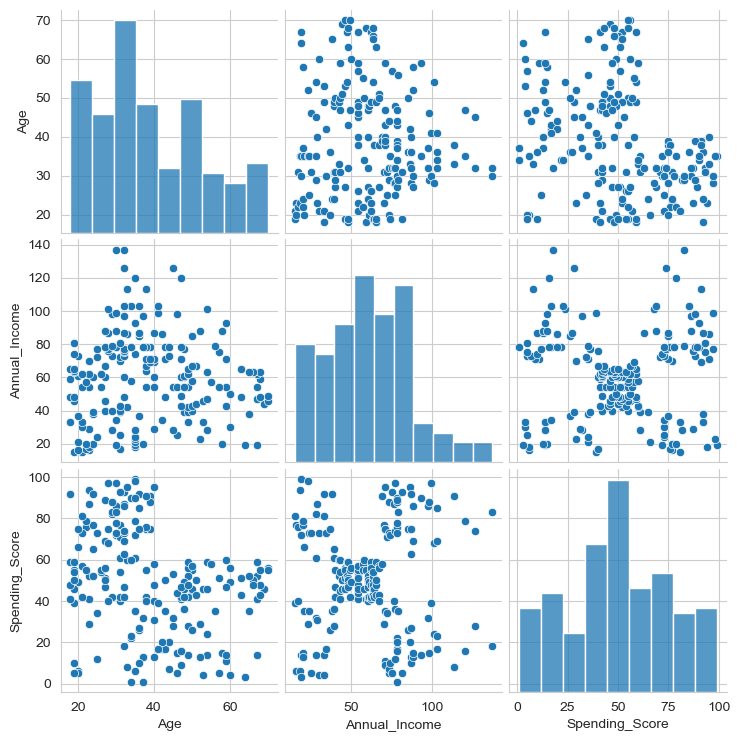

In [25]:
sns.pairplot(df);

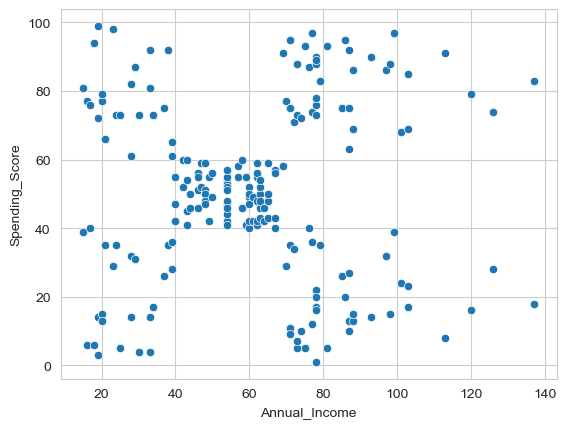

In [29]:
# This scatter plot helps us visualize some possible clusters
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score');

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [31]:
dfn = df.drop(columns="Gender")

In [32]:
dfn.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [33]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
        X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [34]:
hopkins(dfn, 1)

0.6898524475712179

In [38]:
age_ss = df.drop(columns=["Gender", "Annual_Income"])
age_ss

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

### Elbow Method

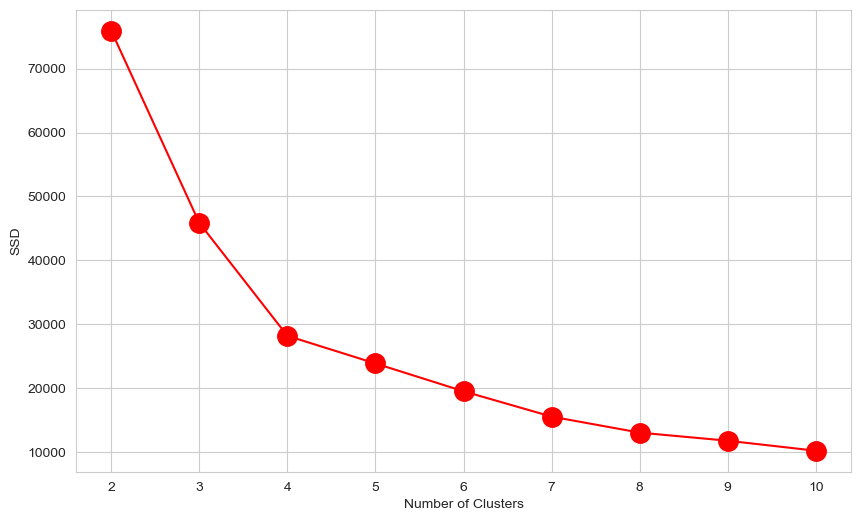

In [50]:
n_clusters_range = np.arange(2, 11)
ssd = [KMeans(n_clusters=n).fit(age_ss).inertia_ for n in n_clusters_range]

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, ssd, "ro-", markersize=14.0)
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()


Text(0.5, 1.0, 'elbow method')

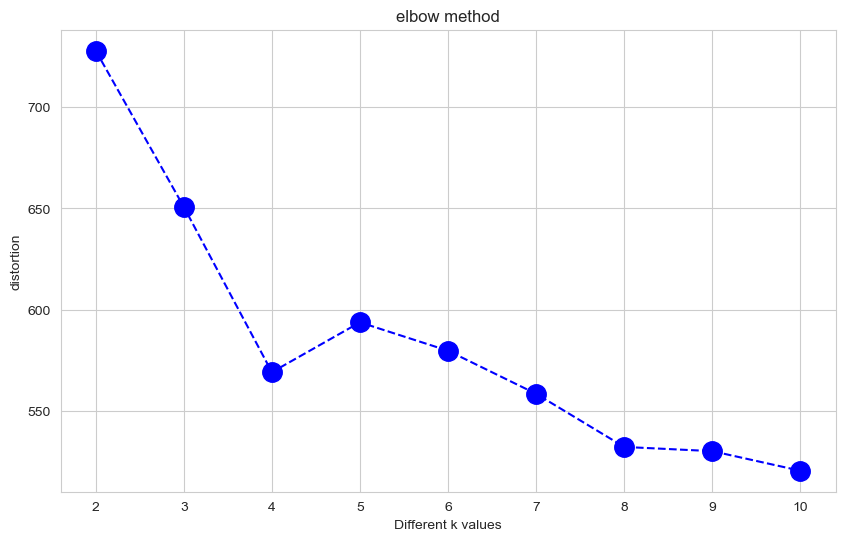

In [56]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(age_ss)
    distances = kmeanModel.transform(age_ss)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))
    
plt.figure(figsize=(10,6))
plt.plot(K, distortion, "bo--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [59]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(age_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(age_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


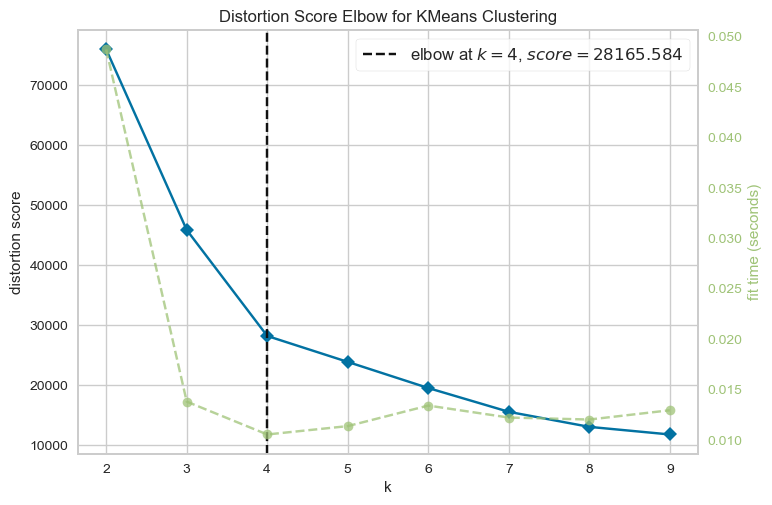

In [74]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(age_ss)
visu.poof();

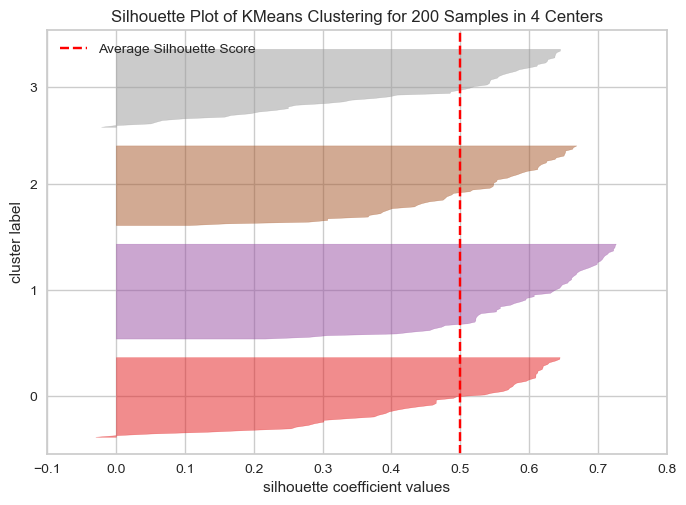

In [79]:
k4 = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(k4)

visualizer.fit(age_ss)
visualizer.show();

#### *iii. Apply K Means*

4 Seems to be our best cluster number according to our findings

In [84]:
kmeans = KMeans(n_clusters=4)

In [85]:
kmeans.fit_predict(age_ss)

array([3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 3, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3,
       0, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [86]:
age_ss_holder = age_ss.copy()

In [87]:
age_ss_holder["cluster_Kmeans"] = kmeans.fit_predict(age_ss)
age_ss_holder.head()

,Age,Spending_Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


#### *iv. Visualizing and Labeling All the Clusters*

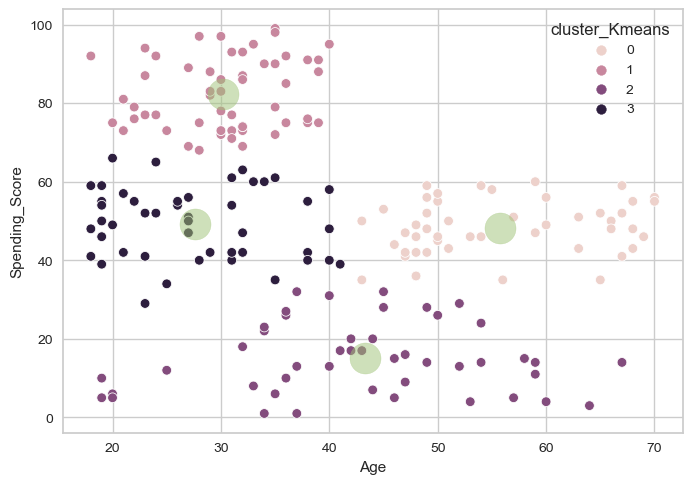

In [102]:
sns.scatterplot(x='Age', y='Spending_Score', hue='cluster_Kmeans', data=age_ss_holder)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=500, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [103]:
ai_ss = df.drop(columns=["Gender", "Age"])
ai_ss.head()


,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [112]:
hopkins(ai_ss, 1)

0.6954878576487642

#### *ii. Determine optimal number of clusters*

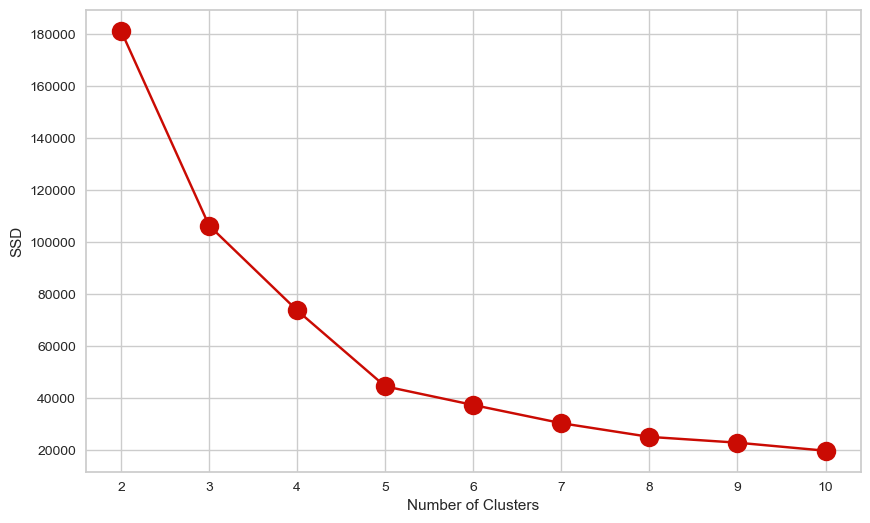

In [113]:
n_clusters_range = np.arange(2, 11)
ssd = [KMeans(n_clusters=n).fit(ai_ss).inertia_ for n in n_clusters_range]

plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, ssd, "ro-", markersize=14.0)
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()


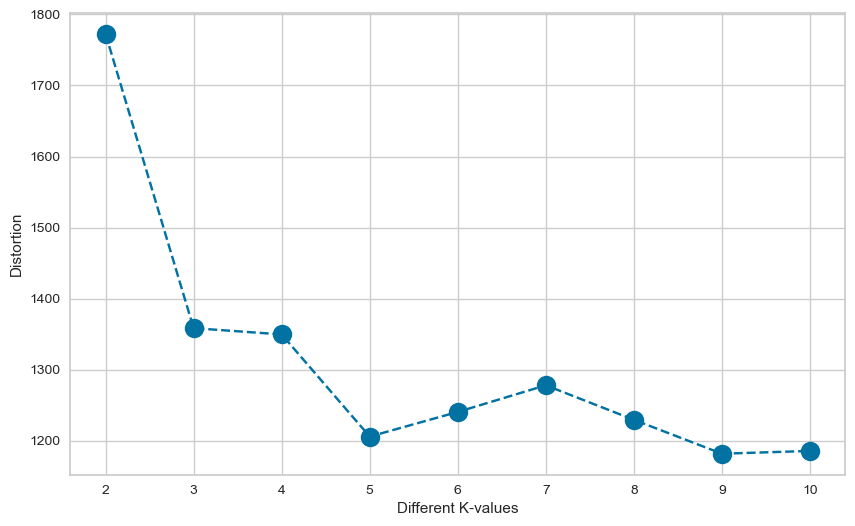

In [118]:
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ai_ss)
    distances = kmeanModel.transform(ai_ss)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))
    
plt.figure(figsize=(10,6))
plt.plot(K, distortion, "bo--", markersize=14.0)
plt.xlabel("Different K-values")
plt.ylabel("Distortion");

In [119]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(ai_ss)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5376203956398481
For n_clusters=7, the silhouette score is 0.5270287298101395
For n_clusters=8, the silhouette score is 0.45492755850983463
For n_clusters=9, the silhouette score is 0.454009143017081
For n_clusters=10, the silhouette score is 0.4385593655821317


5 Clusters are the best option here

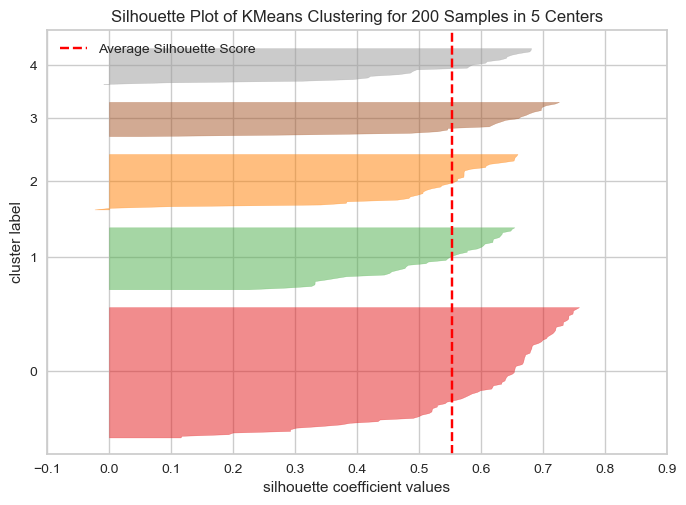

In [122]:
k5 = KMeans(n_clusters=5)
visualizer = SilhouetteVisualizer(k5)

visualizer.fit(ai_ss)
visualizer.show();

#### *iii. Apply K Means*

In [123]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit_predict(ai_ss)

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [124]:
ai_ss_holder = ai_ss.copy()
ai_ss_holder['cluster_Kmeans'] = kmeans2.fit_predict(ai_ss) #kmeans2.labels_
ai_ss_holder.head()

,Annual_Income,Spending_Score,cluster_Kmeans
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


#### *iv. Visualizing and Labeling All the Clusters*

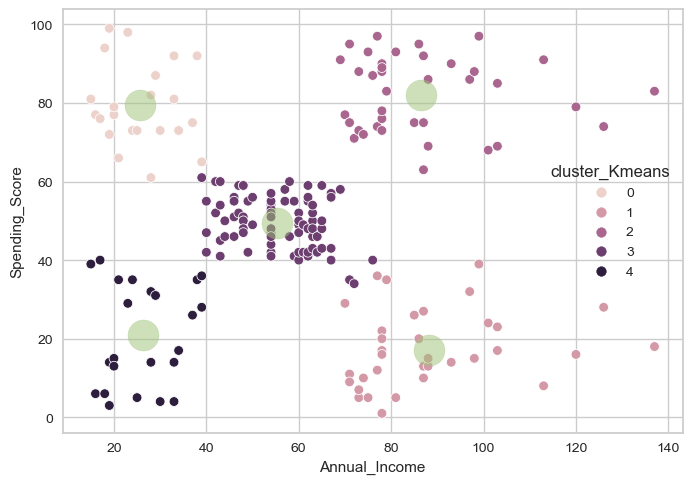

In [126]:
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster_Kmeans', data=ai_ss_holder)
centroids = kmeans2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=500, alpha=0.5);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [163]:
hc_ward = linkage(y = age_ss, method = "ward")                        
hc_complete = linkage(age_ss, "complete")
hc_average = linkage(age_ss, "average")
hc_single = linkage(age_ss, "single")

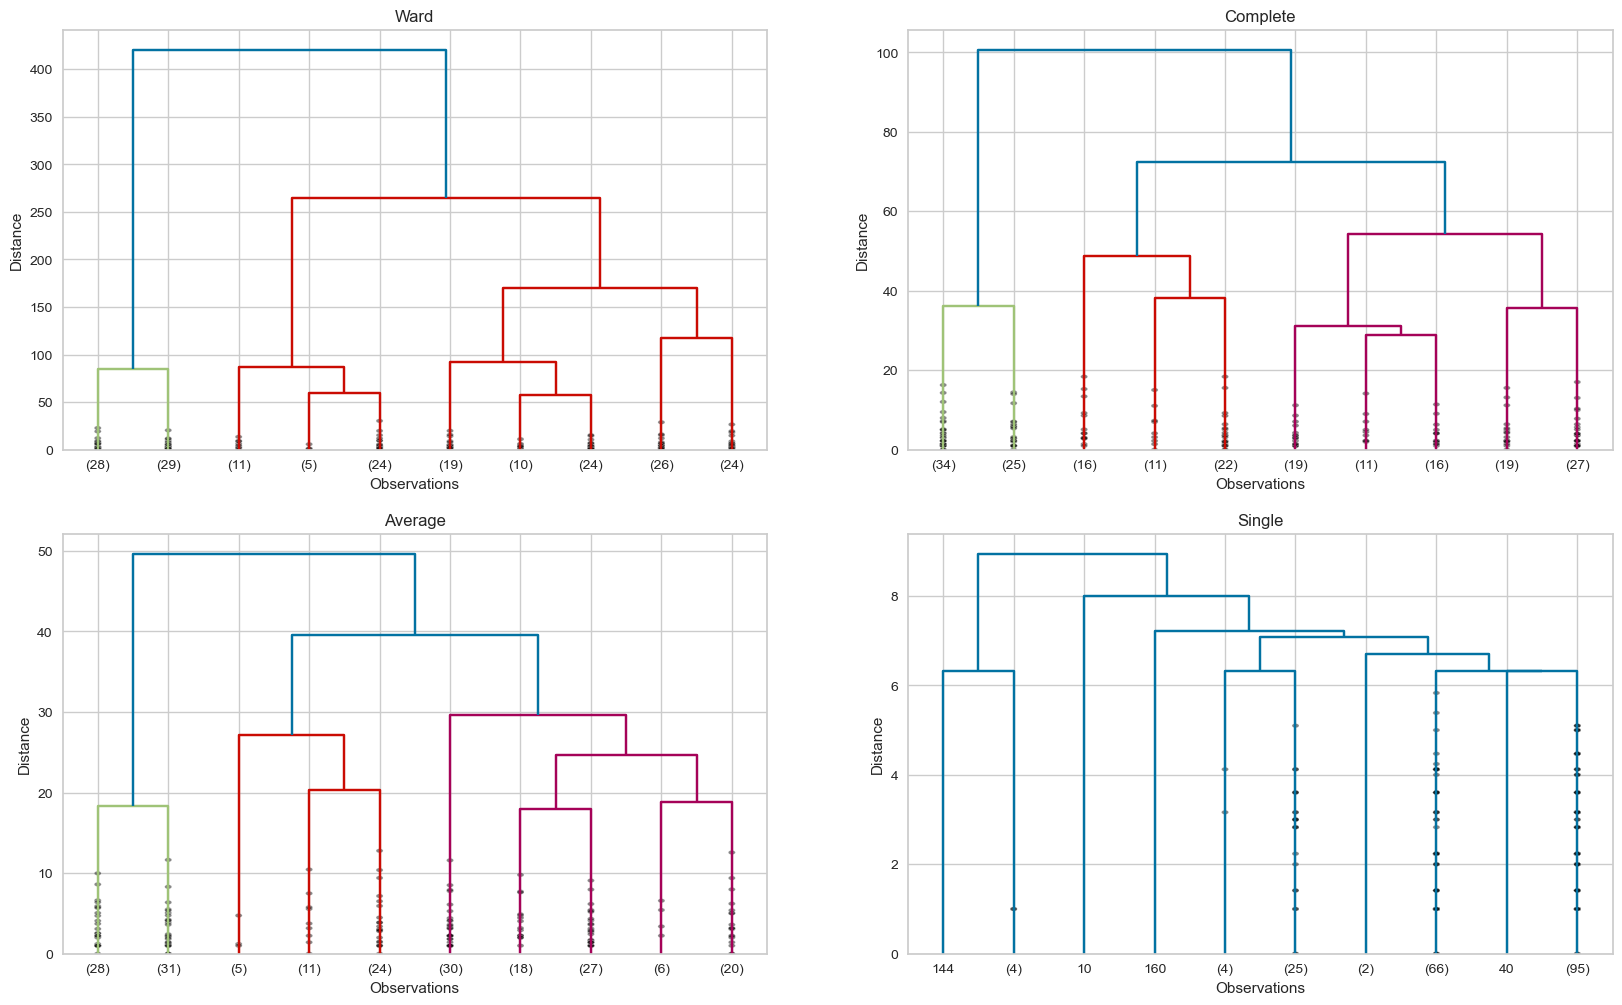

In [164]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", 
           p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", 
           p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", 
           p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", 
           p = 10, show_contracted = True, leaf_font_size = 10);

In [144]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(ai_ss)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(ai_ss, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


## Clustering based on Annual Income and Spending Score- x2

In [165]:
hc_ward = linkage(y = ai_ss, method = "ward")                        
hc_complete = linkage(ai_ss, "complete")
hc_average = linkage(ai_ss, "average")
hc_single = linkage(ai_ss, "single")

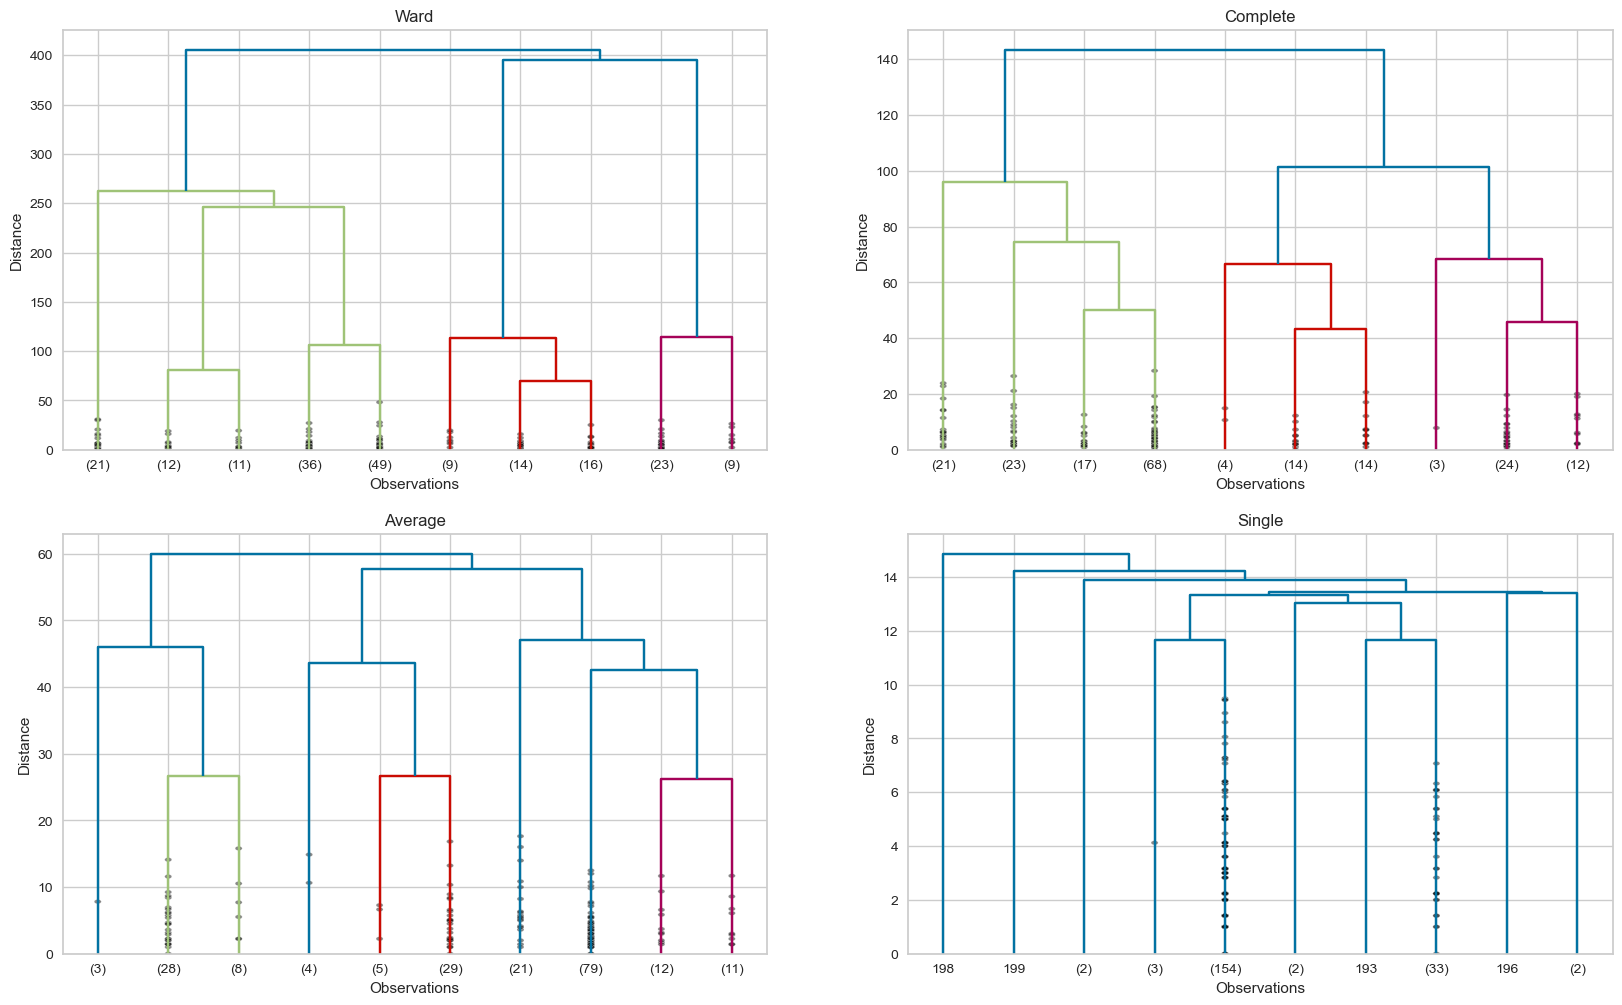

In [166]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [146]:
aggCls = AgglomerativeClustering(
    n_clusters=4, metric= 'euclidean', linkage='ward')

y_agg = aggCls.fit_predict(age_ss)

In [147]:
age_ss_holder['cluster_Agg'] = y_agg
age_ss_holder.head()

,Age,Spending_Score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [148]:
aggCls2 = AgglomerativeClustering(
    n_clusters=4, metric= 'euclidean', linkage='ward')

y_agg2 = aggCls2.fit_predict(ai_ss)

In [149]:
ai_ss_holder['cluster_Agg'] = y_agg2
ai_ss_holder.head()

,Annual_Income,Spending_Score,cluster_Kmeans,cluster_Agg
0,15,39,4,0
1,15,81,0,3
2,16,6,4,0
3,16,77,0,3
4,17,40,4,0


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

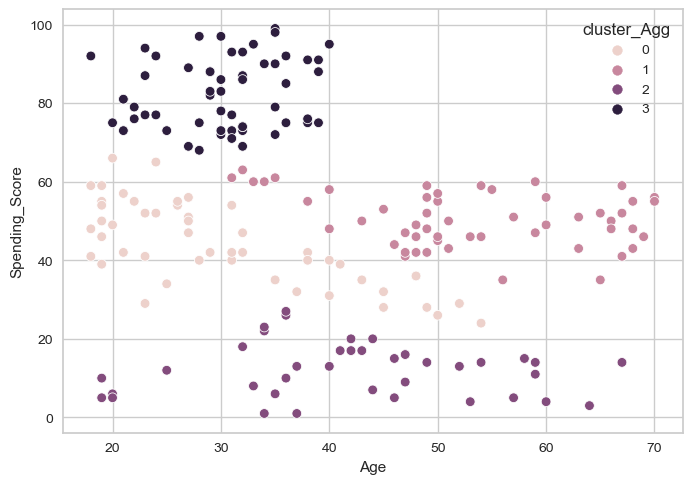

In [154]:
sns.scatterplot(data=age_ss_holder, x='Age', y='Spending_Score', hue='cluster_Agg');

#### Annual Income and Spending Score- x2

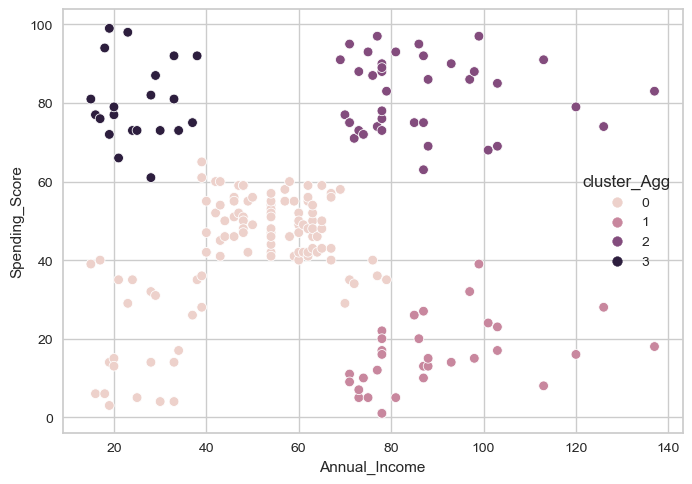

In [155]:
sns.scatterplot(data=ai_ss_holder, x='Annual_Income', y='Spending_Score', hue='cluster_Agg');

#### Interpretation based on Age and Spending Score- x1

Apart from cluster 1, the data points are uniformly dispersed

In [168]:
age_ss_holder.cluster_Kmeans.value_counts()

cluster_Kmeans
1    57
2    48
0    48
3    47
Name: count, dtype: int64

Let's bring see how these clusters represent gender-wise

In [170]:
df["cluster_Age_Spending_Score"] = age_ss_holder.cluster_Kmeans

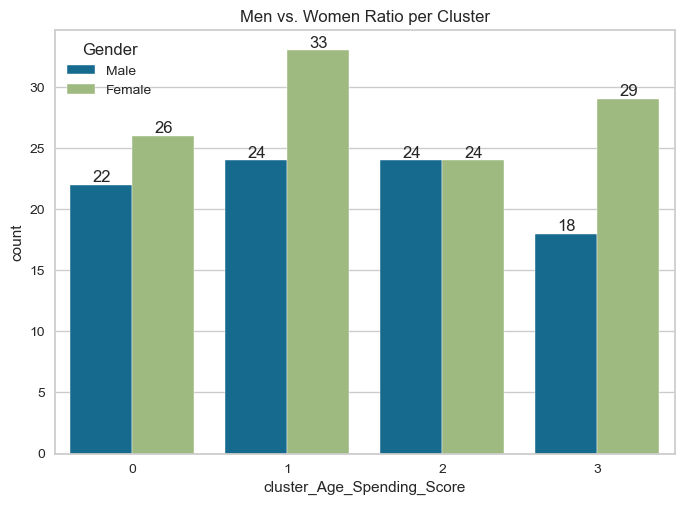

In [172]:
plt.title("Men vs. Women Ratio per Cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for i in ax.containers:
    ax.bar_label(i)

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.  

**cluster 2**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

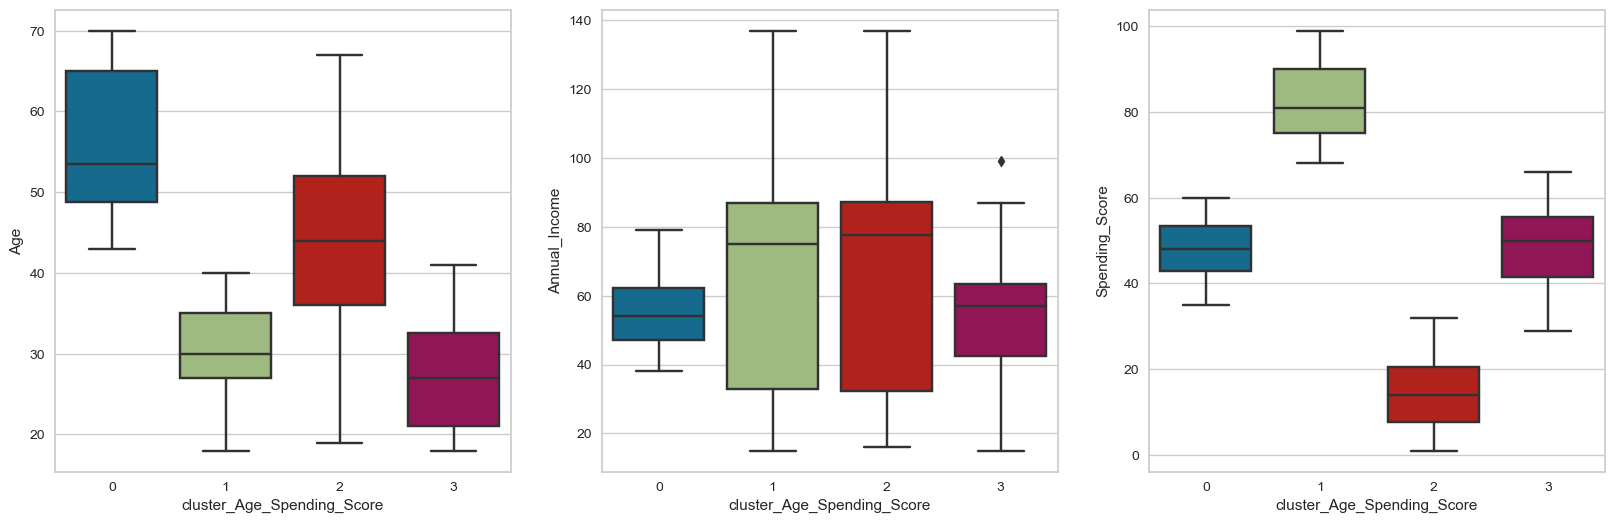

In [173]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Age_Spending_Score", data = df);

In [176]:
df["cluster_Annual_Income_Spending_Score"] = ai_ss_holder.cluster_Kmeans

#### Interpretation based on Annual Income and Spending Score- x2

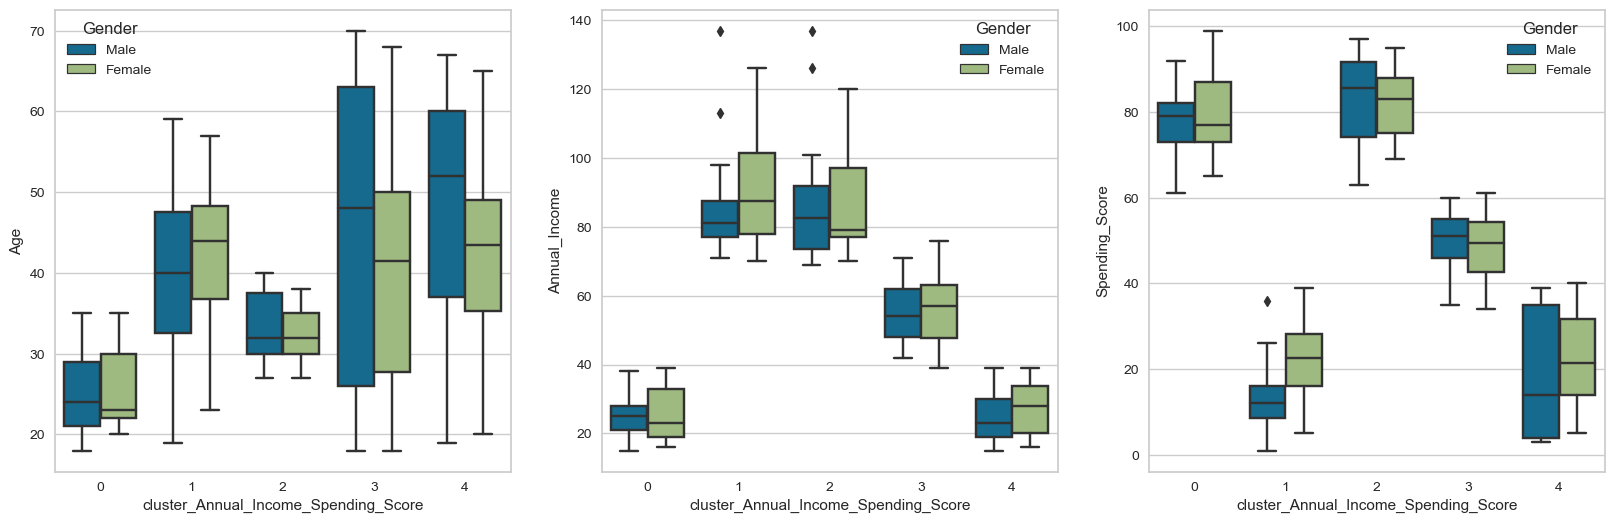

In [177]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df);

## Conclusion

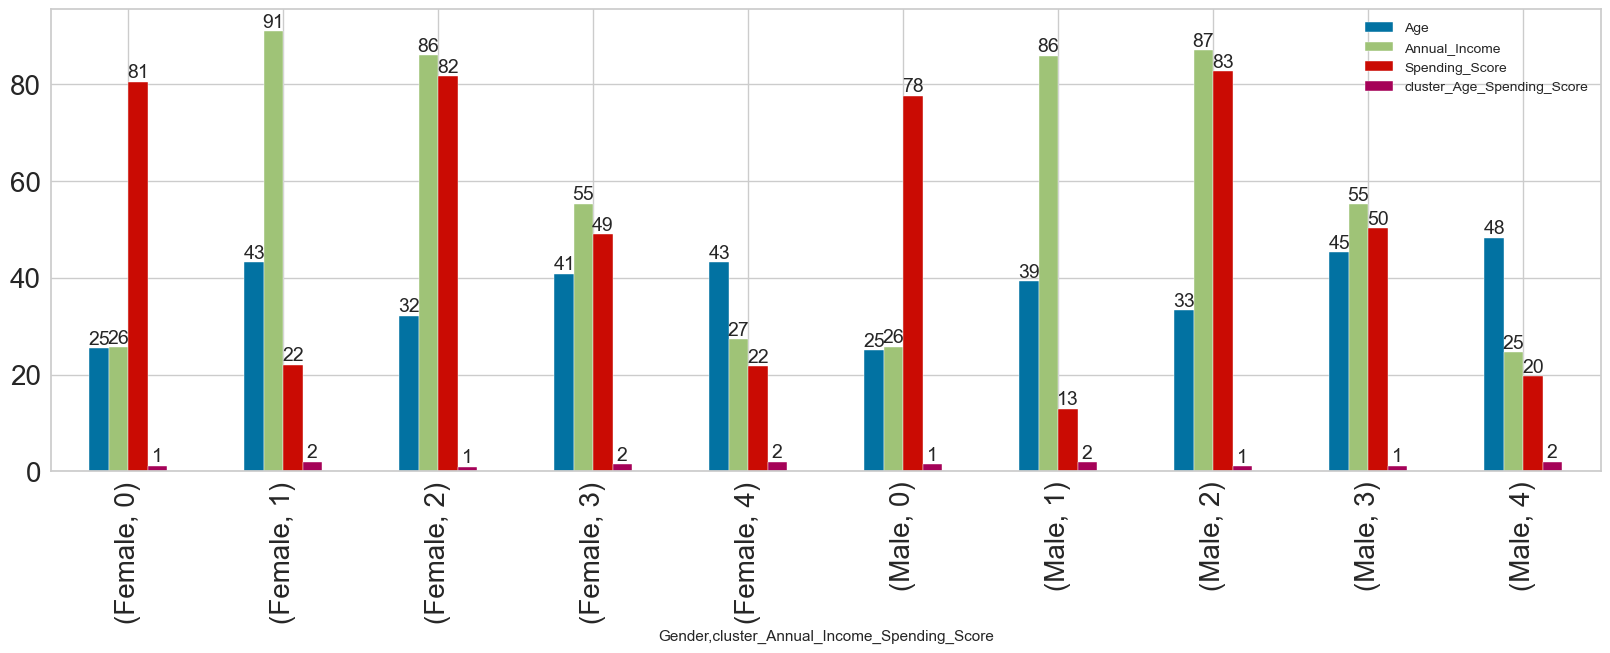

In [180]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for i in ax.containers:
    ax.bar_label(i, fmt="%.0f", size=14)

## Female Customer Segmentation Analysis

### Cluster 0 (Young High-Spenders):
Customers in this cluster, with an average age around 25, have low annual incomes but exhibit exceptionally high spending scores. Despite their frequent shopping habits, this group does not significantly contribute to profits.

**Description:**
This segment represents young female shoppers who indulge in shopping frequently but do not generate substantial profits for the company. While they are active shoppers, strategies to enhance their profitability should be explored.

---

### Cluster 1 (Affluent Target Audience):
With an average age of around 43, this cluster possesses very high annual incomes but comparatively low spending scores. Specialized strategies need to be developed to tap into the potential of this affluent customer base.

**Description:**
This group comprises females with substantial financial resources. To unlock their spending potential, tailored marketing approaches and exclusive offers should be implemented, ensuring their engagement and increased spending.

---

### Cluster 2 (Loyal High-Spenders):
Customers in this segment, averaging around 32 years old, exhibit both high annual incomes and spending scores. They represent our loyal customer base and are vital to the company's profits. Exclusive promotions and personalized services should be offered to maintain their loyalty and maximize revenue.

**Description:**
This cluster consists of our devoted female customers who consistently spend at high levels. Ensuring their satisfaction through personalized promotions is crucial to retaining their loyalty and ensuring a steady stream of profits for the company.

---

### Cluster 3 (Average Spenders):
This cluster, with an average age of around 41, demonstrates moderate annual incomes and spending scores. Further research is needed to identify strategies to encourage higher spending within this group.

**Description:**
Customers in this segment exhibit average spending behavior. To enhance their spending, detailed research should be conducted to understand their preferences and motivations better, allowing the company to design targeted strategies to increase their shopping activity.

---

### Cluster 4 (Gift Certificate Shoppers):
With an average age of around 43, customers in this cluster possess both low annual incomes and spending scores. Encouraging shopping through gift certificates could be an effective approach to boost engagement within this group.

**Description:**
This group consists of females with limited financial resources. To stimulate their spending, offering shopping incentives in the form of gift certificates can act as a catalyst, encouraging their participation and increasing their overall spending.


### Male

**Cluster 0** (High-Spending Non-Profitable Shoppers):
Customers in this cluster, averaging around 25 years of age, exhibit low annual incomes but exceptionally high spending scores. Despite their frequent shopping habits, this group does not significantly contribute to profits.

**Description:**
This segment represents young male shoppers who engage in frequent shopping activities. However, their spending habits do not translate into substantial profits for the company. Strategies to enhance their profitability and increase their contribution to revenue should be explored.

---

**Cluster 1** (Gift Certificate Shoppers):
With an average age of around 50, customers in this cluster have both low annual incomes and spending scores. Encouraging shopping through gift certificates could be an effective approach to boost engagement within this group.

**Description:**
This group consists of older male individuals with limited financial resources. Offering shopping incentives in the form of gift certificates can encourage their participation and increase their overall spending.

---

**Cluster 2** (Loyal High-Spenders):
Customers in this segment, around the age of 30, exhibit both high annual incomes and spending scores. They represent our loyal customer base and are vital to the company's profits. Exclusive promotions and personalized services should be offered to maintain their loyalty and maximize revenue.

**Description:**
This cluster comprises male customers who consistently spend at high levels. Ensuring their satisfaction through personalized promotions is crucial to retaining their loyalty and ensuring a steady stream of profits for the company.

---

**Cluster 3** (Average Spenders with Growth Potential):
With an average age of around 45, this cluster demonstrates moderate annual incomes and spending scores. Further research is needed to identify strategies to encourage higher spending within this group.

**Description:**
Customers in this segment exhibit average spending behavior. To enhance their spending, detailed research should be conducted to understand their preferences and motivations better, allowing the company to design targeted strategies to increase their shopping activity.

---

**Cluster 4** (Affluent But Low-Spending Target Audience):
Around 40 years old on average, customers in this cluster have very high annual incomes but surprisingly low spending scores. This group represents a potential high-value audience. Specialized strategies and promotions tailored to their interests should be developed to increase their spending.

**Description:**
This cluster comprises male individuals with significant financial resources. Unlocking their spending potential requires tailored marketing approaches and exclusive offers, ensuring their engagement and increased spending, and ultimately maximizing their value to the company.


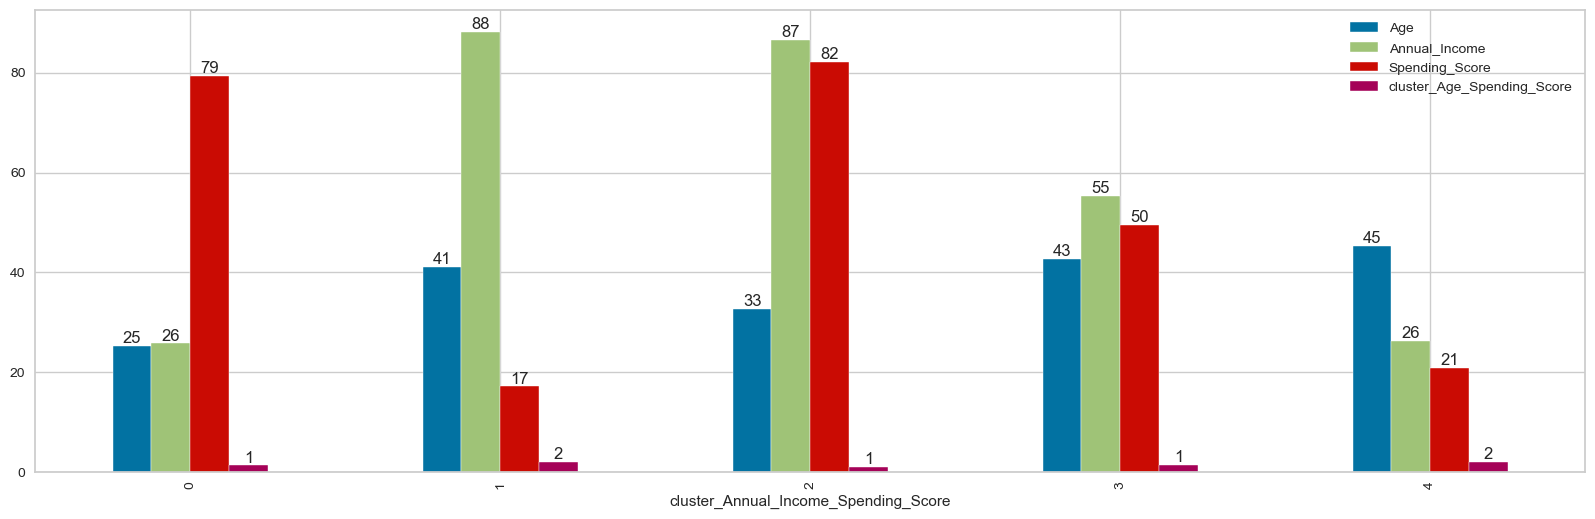

In [179]:
ax = df.drop(columns = 'Gender').groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.0f")

## Customer Segmentation Analysis

### Cluster 0:
Customers in this cluster, averaging around 25 years of age, have low annual incomes but remarkably high spending scores. Despite their active shopping habits, this group does not significantly contribute to profits.

**Description:**
This segment comprises young individuals who frequently shop but do not generate substantial profits for the company. Strategies to enhance their profitability should be explored.

---

### Cluster 1:
With an average age of around 45, customers in this cluster have both low annual incomes and spending scores. Directing them to shopping with gift certificates could be an effective approach to boost their engagement.

**Description:**
This group consists of middle-aged individuals with limited financial resources. Encouraging their participation through shopping incentives like gift certificates can increase their overall spending.

---

### Cluster 2:
Customers in this segment, around the age of 40, possess very high annual incomes but surprisingly low spending scores. This group represents a potential high-value audience. Specialized strategies and promotions tailored to their interests should be developed to increase their spending.

**Description:**
This cluster comprises individuals with significant financial resources. Unlocking their spending potential requires tailored marketing approaches and exclusive offers, ensuring their engagement and increased spending, and ultimately maximizing their value to the company.

---

### Cluster 3:
With an average age of around 40, customers in this cluster exhibit average annual incomes and spending scores. Further research is needed to identify strategies to encourage higher spending within this group.

**Description:**
Customers in this segment exhibit moderate spending behavior. To enhance their spending, detailed research should be conducted to understand their preferences and motivations better, allowing the company to design targeted strategies to increase their shopping activity.

---

### Cluster 4:
Around 30 years old on average, customers in this cluster have both high annual incomes and spending scores. This group consists of our loyal customers, and the company derives significant profit from them. Implementing exclusive promotions is essential to maintain their loyalty and maximize revenue.

**Description:**
This cluster represents our dedicated customer base, consistently spending at high levels. Ensuring their satisfaction through personalized promotions is crucial to retaining their loyalty and ensuring a steady stream of profits for the company.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___